In [1]:
import datetime
from pandas.errors import EmptyDataError
import pandas as pd
import glob 


def logtofile(log_text, verbose=True):
    if verbose:
        print(log_text)
    with open(save_log_as, "a") as f:    
        print(log_text, file=f)


def csv_to_df(path):
    csv_files = glob.glob(path) 
      
    dfs = []
    for f in csv_files:       
        try:
            df = pd.read_csv(f)
            logtofile(f, False)
            if len(df) > 0:
                df['layer'] = df['name'].index + 1 
                dfs.append(df)
        except EmptyDataError:
            continue
            
    return pd.concat(dfs, ignore_index=True)

# Rank plotting for Exp 1e (cut to stitch and receiver only) with 10-epoch training

In [2]:
formatted_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
logfile_name = formatted_time + "_ranks_exp1_log.txt"
save_log_as = f"./results/{logfile_name}"
logtofile(f"Logging to {save_log_as}")
import os 
csvs_from = os.path.join("../msc_similarity/exp1_ms_with_random_dataset/results_rank/", "*.csv")
df = csv_to_df(csvs_from)

Logging to ./results/2024-08-05_11-15-06_ranks_exp1_log.txt


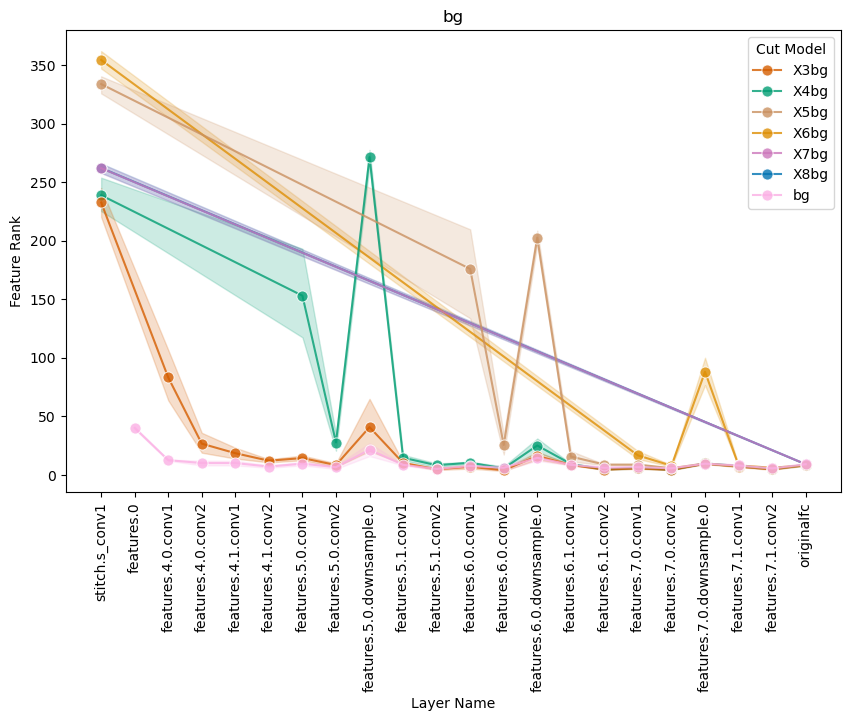

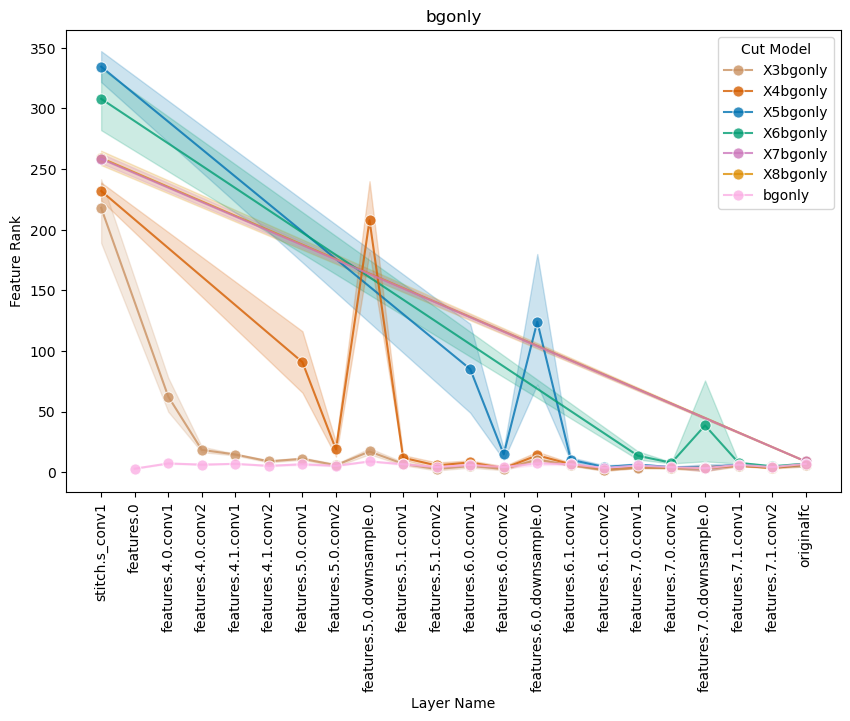

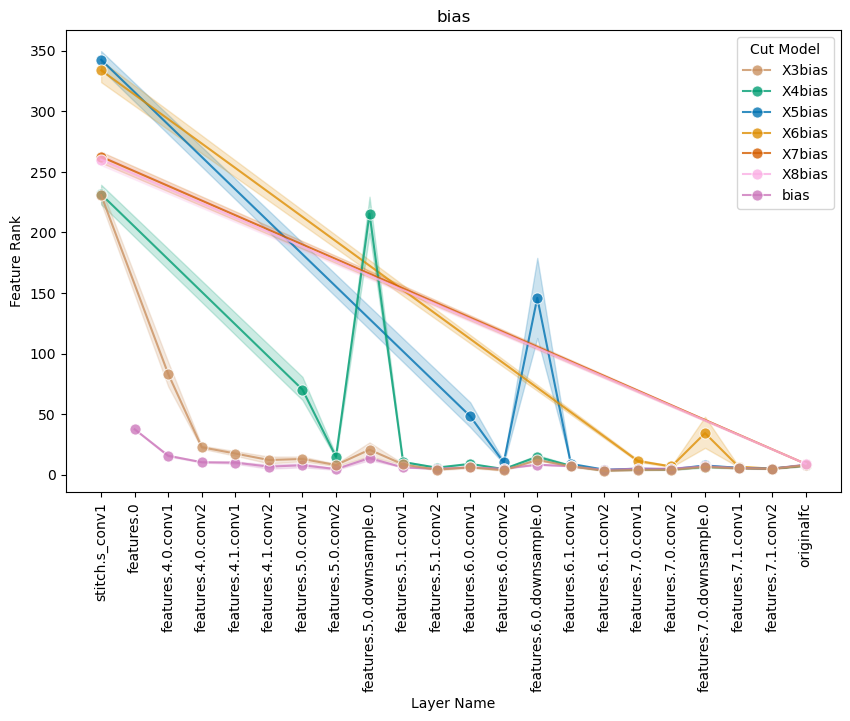

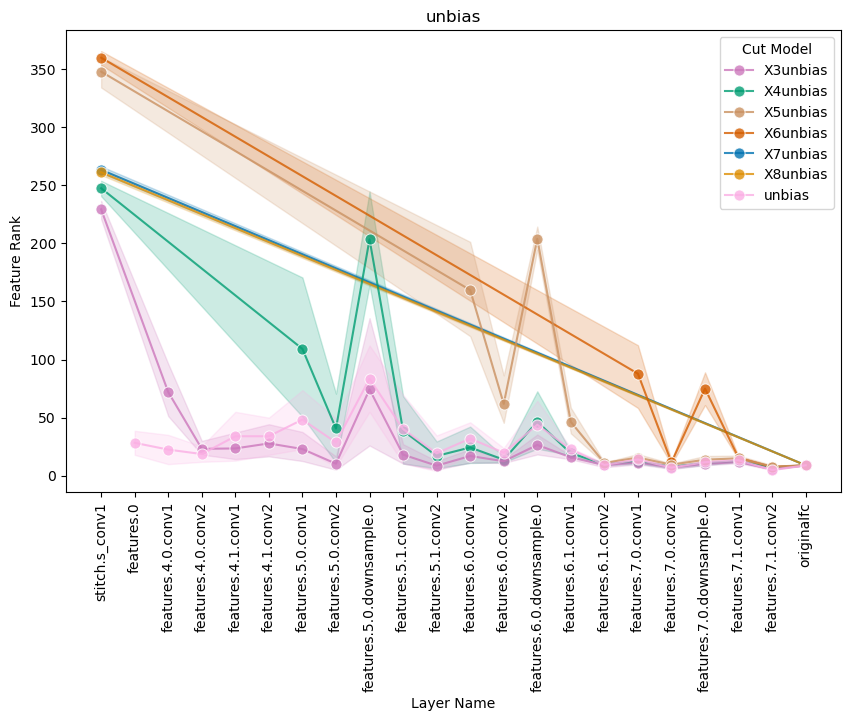

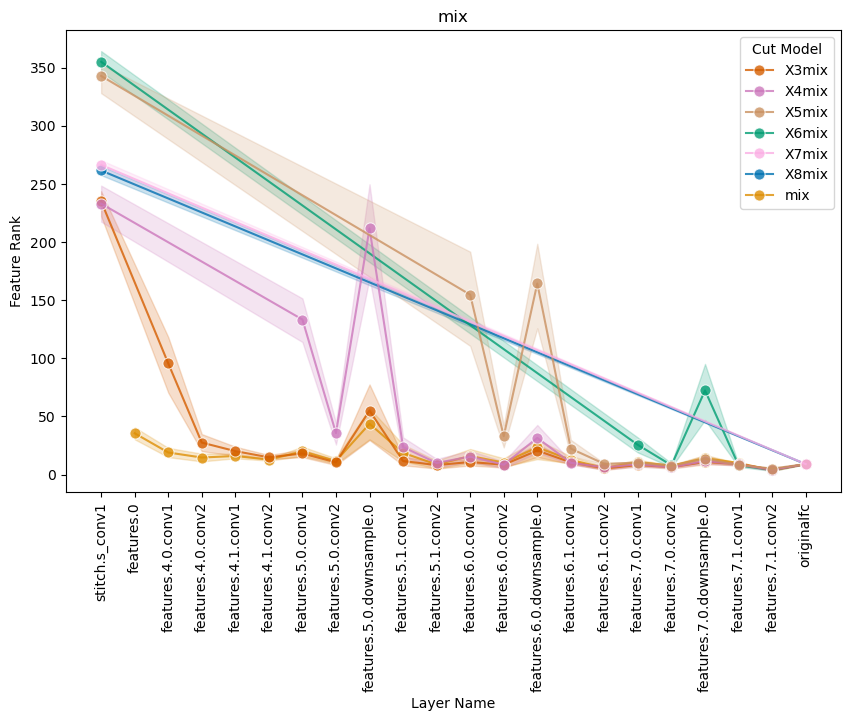

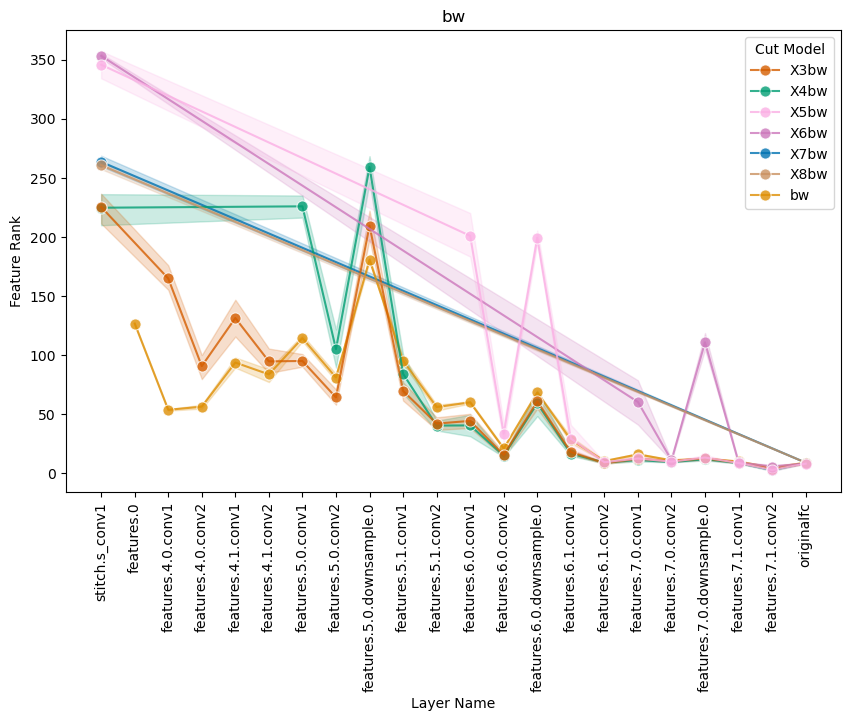

sizes={'bg': 469, 'bgonly': 492, 'bias': 492, 'unbias': 492, 'mix': 492, 'bw': 492}


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# cheatingly noted the text names of the layers in order.
# Note that the stitch.s_conv1 layer appears first in the list, even though conceptually it 
# could be considered to be in the middle of the full network at the point of the cut
cat_order = ['stitch.s_conv1', 'features.0', 'features.4.0.conv1', 'features.4.0.conv2', 'features.4.1.conv1', 'features.4.1.conv2', 'features.5.0.conv1', 'features.5.0.conv2', 'features.5.0.downsample.0', 'features.5.1.conv1', 'features.5.1.conv2', 'features.6.0.conv1', 'features.6.0.conv2', 'features.6.0.downsample.0', 'features.6.1.conv1', 'features.6.1.conv2', 'features.7.0.conv1', 'features.7.0.conv2', 'features.7.0.downsample.0', 'features.7.1.conv1', 'features.7.1.conv2', 'originalfc']

graphs = {'bg': 'bg$', 'bgonly': 'bgonly', 'bias': '(?<!un)bias',  # these three may learn colours as a shortcut
          'unbias': 'unbias', 'mix': 'mix', 'bw': 'bw'}            # these three have to learn to read digits
sizes = {}
for k, v in graphs.items(): 
    matchpattern = v
    # unsorted dataframe, but filtered to include only the data for one base model type
    df2 = df[(df['model'].str.contains(matchpattern)) ].copy()
    sizes[k] = len(df2)
    # Sort the model column and create a categorical type with sorted categories 
    # e.g models are X6bgonly or bgonly
    df2['name'] = pd.Categorical(df2['name'], categories=cat_order, ordered=True)

    # Create line plot
    plt.figure(figsize=(10, 6))
    line_plot = sns.lineplot(data=df2, x='name', y='features_rank', hue='model', marker='o', markersize=8, alpha=0.8, palette='colorblind')
    
    plt.title(k)
    plt.xlabel('Layer Name')
    plt.ylabel('Feature Rank')
    plt.xticks(rotation=90)
    
    handles, labels = line_plot.get_legend_handles_labels()
    sorted_labels_handles = sorted(zip(labels, handles))
    labels, handles = zip(*sorted_labels_handles)
    plt.legend(handles, labels, title='Cut Model', loc='upper right')
    plt.savefig(f"./results/{k}_rank.png", bbox_inches='tight')
    plt.show()
print(f"{sizes=}")

# Rank plotting for Exp 1f (cut to stitch and receiver only) with 4-epoch training

Logging to ./results/2024-08-05_11-15-22_ranks_exp1f_log.txt


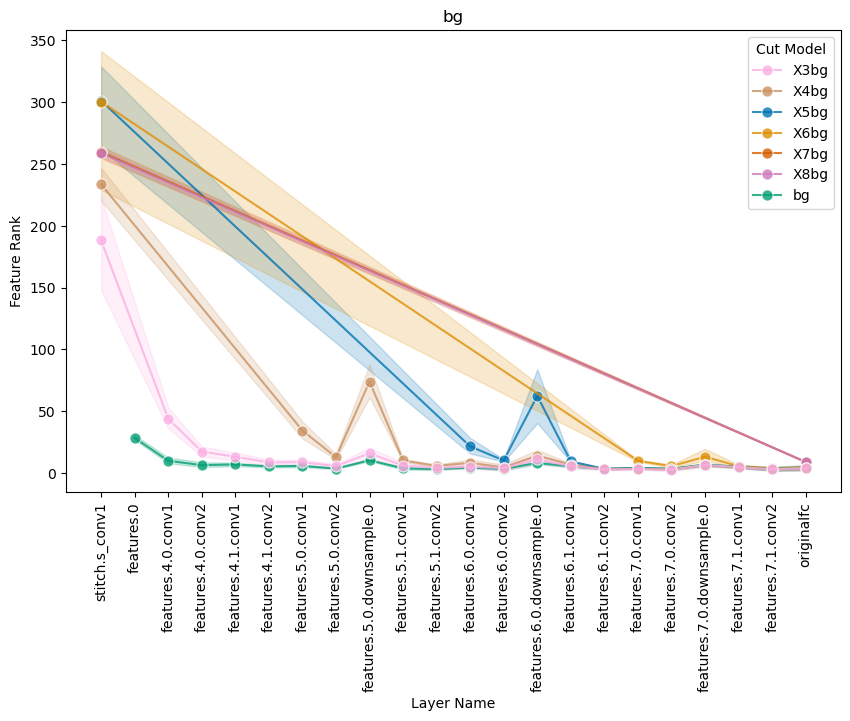

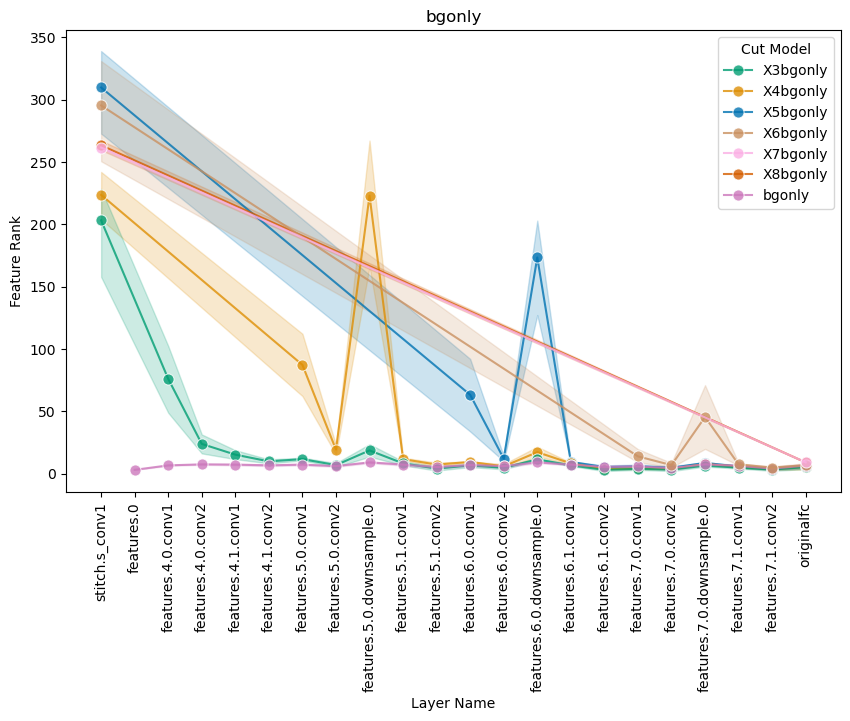

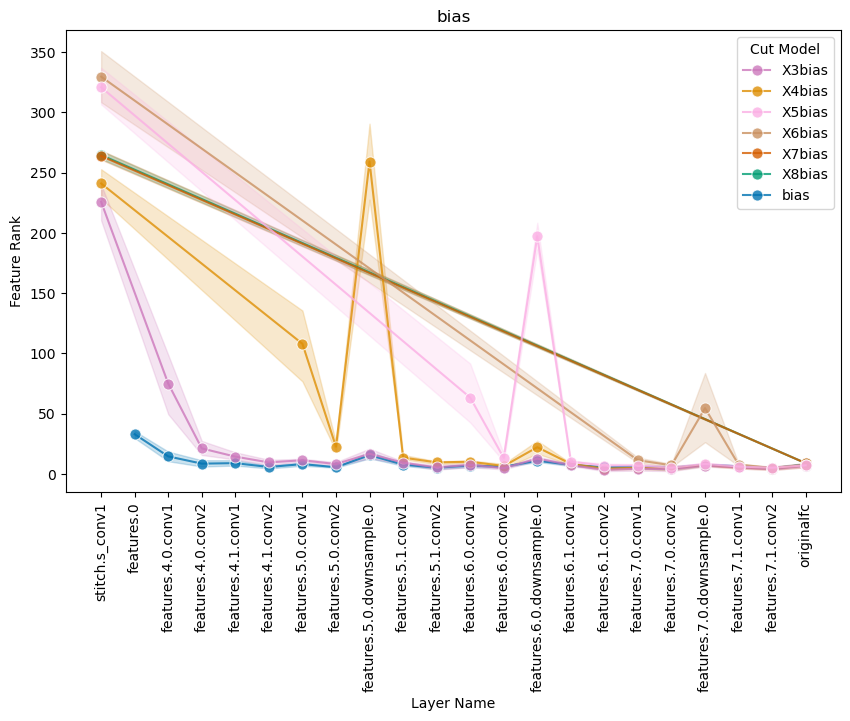

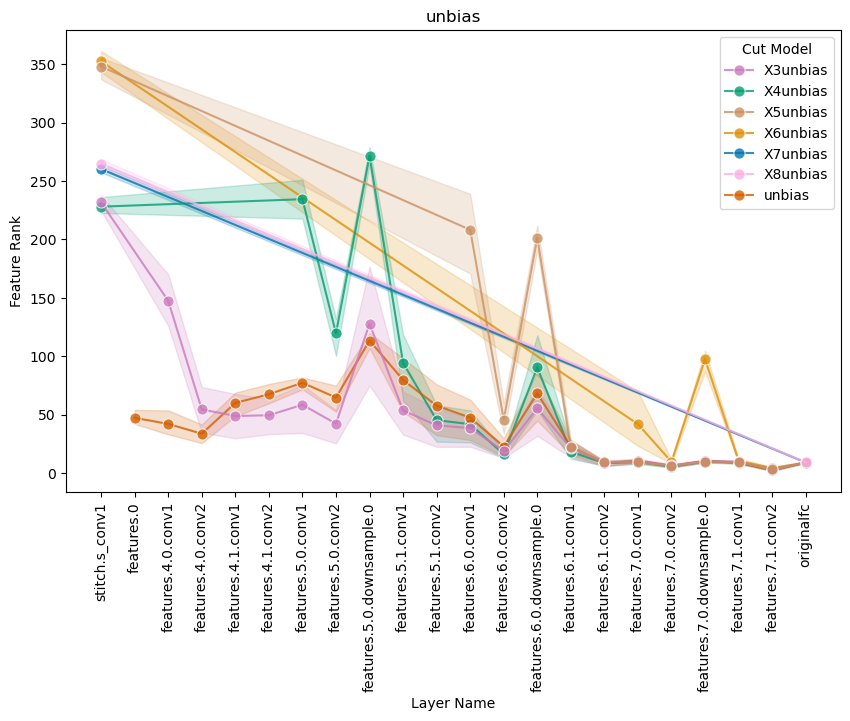

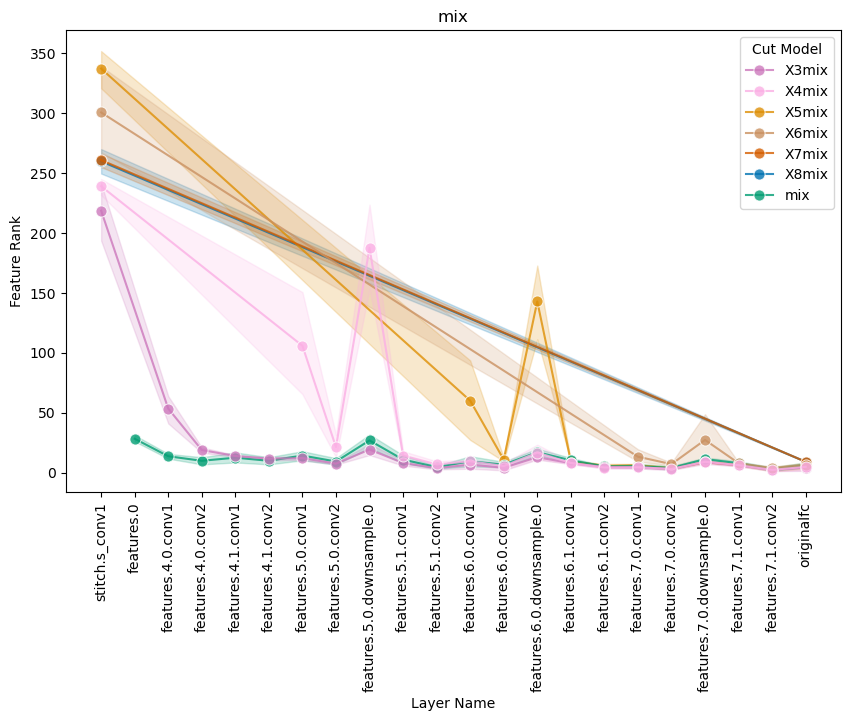

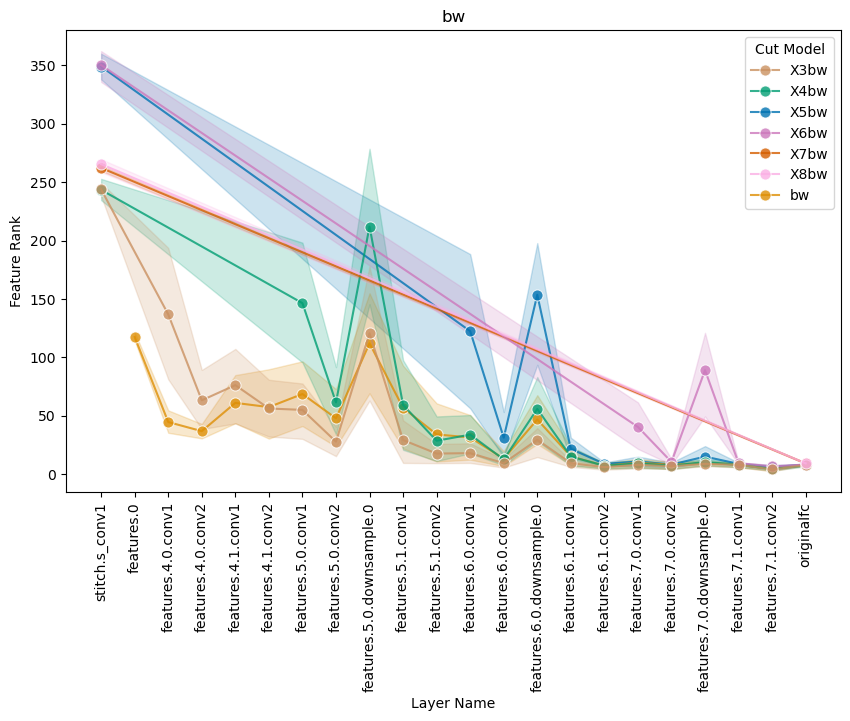

sizes={'bg': 410, 'bgonly': 410, 'bias': 410, 'unbias': 410, 'mix': 410, 'bw': 410}


In [4]:
formatted_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
logfile_name = formatted_time + "_ranks_exp1f_log.txt"
save_log_as = f"./results/{logfile_name}"
logtofile(f"Logging to {save_log_as}")
import os 
csvs_from = os.path.join("../msc_similarity/exp1_ms_with_random_dataset/results_4_epochs_rank/", "*.csv")
df = csv_to_df(csvs_from)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# cheatingly noted the text names of the layers in order.
# Note that the stitch.s_conv1 layer appears first in the list, even though conceptually it 
# could be considered to be in the middle of the full network at the point of the cut
cat_order = ['stitch.s_conv1', 'features.0', 'features.4.0.conv1', 'features.4.0.conv2', 'features.4.1.conv1', 'features.4.1.conv2', 'features.5.0.conv1', 'features.5.0.conv2', 'features.5.0.downsample.0', 'features.5.1.conv1', 'features.5.1.conv2', 'features.6.0.conv1', 'features.6.0.conv2', 'features.6.0.downsample.0', 'features.6.1.conv1', 'features.6.1.conv2', 'features.7.0.conv1', 'features.7.0.conv2', 'features.7.0.downsample.0', 'features.7.1.conv1', 'features.7.1.conv2', 'originalfc']

graphs = {'bg': 'bg$', 'bgonly': 'bgonly', 'bias': '(?<!un)bias',  # these three may learn colours as a shortcut
          'unbias': 'unbias', 'mix': 'mix', 'bw': 'bw'}            # these three have to learn to read digits
sizes = {}
for k, v in graphs.items(): 
    matchpattern = v
    # unsorted dataframe, but filtered to include only the data for one base model type
    df2 = df[(df['model'].str.contains(matchpattern)) ].copy()
    sizes[k] = len(df2)
    # Sort the model column and create a categorical type with sorted categories 
    # e.g models are X6bgonly or bgonly
    df2['name'] = pd.Categorical(df2['name'], categories=cat_order, ordered=True)

    # Create line plot
    plt.figure(figsize=(10, 6))
    line_plot = sns.lineplot(data=df2, x='name', y='features_rank', hue='model', marker='o', markersize=8, alpha=0.8, palette='colorblind')
    
    plt.title(k)
    plt.xlabel('Layer Name')
    plt.ylabel('Feature Rank')
    plt.xticks(rotation=90)
    
    handles, labels = line_plot.get_legend_handles_labels()
    sorted_labels_handles = sorted(zip(labels, handles))
    labels, handles = zip(*sorted_labels_handles)
    plt.legend(handles, labels, title='Cut Model', loc='upper right')
    plt.savefig(f"./results/{k}_rank.png", bbox_inches='tight')
    plt.show()
print(f"{sizes=}")

# Experiment 2d - Plot Rank After Stitch
Networks trained for 10 epochs. Stitch trained for 10 epochs.
Measure the Rank of the activations in the first layer of the receiver network after the stitch. If the Sender + Stitch were equivalent to the early layers of the receiver network then the rank (after processing by the Receiver) should be unchanged. 

In [5]:
formatted_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
logfile_name = formatted_time + "_ranks_exp2_log.txt"
save_log_as = f"./results_2/{logfile_name}"
logtofile(f"Logging to {save_log_as}")
import os 

# exp2 colour_MNIST
csvs_from = os.path.join("../msc_similarity/exp2_ms_with_colorMNIST/results_rank/", "*.csv")
df1 = csv_to_df(csvs_from)

# exp1 Synthetic stitch
csvs_from = os.path.join("../msc_similarity/exp1_ms_with_random_dataset/results_rank/", "*.csv")
df2 = csv_to_df(csvs_from)

# select only the data for synthetic data stitched into the unbias-trained network 
df3 = df2[df2['model'].str.contains('^X\dunbias')].copy()

df = pd.concat([df1, df3], ignore_index=True)
del df1, df2, df3

# Edit names to match the whole-network naming
df['name'] = df['name'].str.replace(r'_rcv_', '', regex=True)
df['name'] = df['name'].str.replace(r'^rcv_', '', regex=True)
df['name'] = df['name'].str.replace(r'^send_', '', regex=True)


Logging to ./results_2/2024-08-05_11-15-36_ranks_exp2_log.txt


In [6]:
send_models = {'unbias_ref': '^unbias$',
               'bg':         '^bg\d', # these three may learn colours as a shortcut
               'bgonly':     '^bgonly\d', 
               'bias':       '^bias\d',  
               'unbias':     '^unbias\d', # these three have to learn to read digits
               'mix':        '^mix\d', 
               'bw':         '^bw\d',
               'synth':      '^X\dunbias'} # syntetic random data stitched in

df['sender'] = 'unknown'
sizes = {}
for k, v in send_models.items(): 
        
    # unsorted dataframe, but filtered to include only the data for one send model type
    selected_set = (df['model'].str.contains(v))
    df.loc[selected_set, 'sender'] = k
    sizes[k] = len((df['model'].str.contains(v)))

# Check numbers of samples per model
print(f"Check number of samples per model:\n{sizes}")


Check number of samples per model:
{'unbias_ref': 7710, 'bg': 7710, 'bgonly': 7710, 'bias': 7710, 'unbias': 7710, 'mix': 7710, 'bw': 7710, 'synth': 7710}


Check number of samples per model:
{'unbias_ref': 310, 'bg': 310, 'bgonly': 310, 'bias': 310, 'unbias': 310, 'mix': 310, 'bw': 310, 'synth': 310}


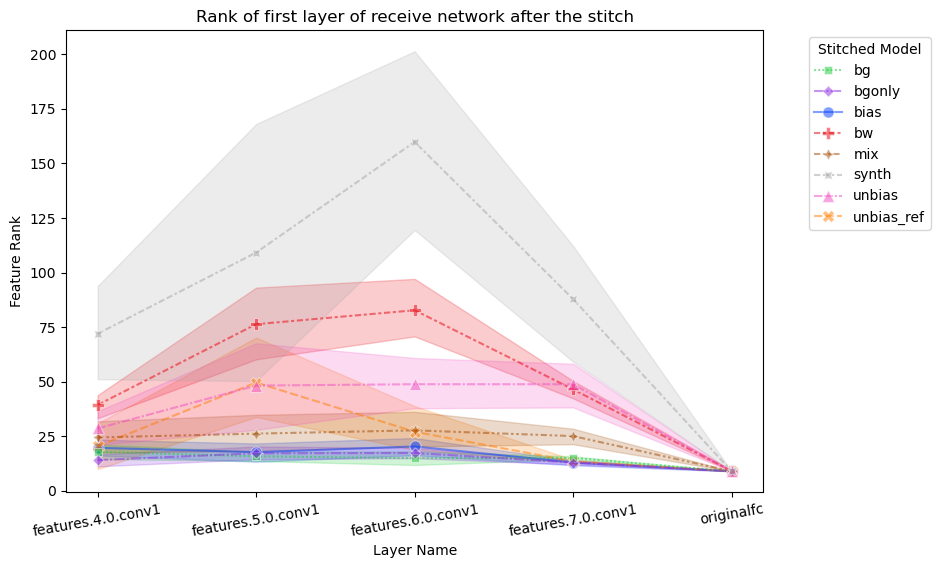

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch

# cheatingly noted the text names of the layers in order.
# Note that the stitch.s_conv1 layer appears first in the list, even though conceptually it 
# could be considered to be in the middle of the full network at the point of the cut
# This made sense for the truncated networks in part 1 but not 
layer_after_stitch = {3: 'features.4.0.conv1',
                      4: 'features.5.0.conv1',
                      5: 'features.6.0.conv1',
                      6: 'features.7.0.conv1',
                      7: 'originalfc'}

cat_order = ['features.4.0.conv1',  
             'features.5.0.conv1',  
             'features.6.0.conv1', 
             'features.7.0.conv1',  
             'originalfc']

combined_condition = pd.Series([False] * len(df))

sizes = {}
for k, v in layer_after_stitch.items(): 

    model_match = (df['model'].str.contains(f"{k}"))
    layer_match = (df['name'].str.contains(v))
    combined_condition |= (model_match & layer_match)

    # Add in the reference model that has no stitch, was trained on unbias dataset but has bias data input to it
    model_match = (df['model'].str.contains(send_models['unbias_ref']))
    layer_match = (df['name'].str.contains(v))
    combined_condition |= (model_match & layer_match)

df2 = df[combined_condition ].copy() 
df3 = df2[df2['sender'] != 'unknown'].copy()

#########################
sizes = {}
for k, v in send_models.items():         
    # Now that d3 has been filtered down, check again how many samples per model
    sizes[k] = len((df3['model'].str.contains(v)))

# Check numbers of samples per model
print(f"Check number of samples per model:\n{sizes}")
#######################

# Sort the model column and create a categorical type with sorted categories 
# e.g models are X6bgonly or bgonly
df3['name'] = pd.Categorical(df3['name'], categories=cat_order, ordered=True)
# Create line plot
plt.figure(figsize=(9,6))
#line_plot = sns.lineplot(data=df3, x='name', y='features_rank', hue='sender', marker='o', markersize=8, alpha=0.5, palette='bright')
line_plot = sns.lineplot(data=df3, x='name', y='features_rank', hue='sender', style='sender', markers=True, dashes=True, markersize=8, alpha=0.5, palette='bright')

plt.title("Rank of first layer of receive network after the stitch")
plt.xlabel('Layer Name')
plt.ylabel('Feature Rank')
#plt.yscale('log')
plt.xticks(rotation=10)

handles, labels = line_plot.get_legend_handles_labels()
sorted_labels_handles = sorted(zip(labels, handles))
labels, handles = zip(*sorted_labels_handles)
plt.legend(handles, labels, title='Stitched Model', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.savefig(f"./results_2d/lin_post_stitch_ranks.png", bbox_inches='tight')
plt.show()



In [8]:
#df2[df2['model']=='unbias']

# Experiment 2d plot the rank of the stitch 
Similarly to the above, examine how the rank of output of Sender and Stitch varies as compared with the rank of the original Receiver network near that point. 


Logging to ./results_3/2024-08-05_11-15-40_ranks_exp3_log.txt
Check number of samples per model:
{'unbias_ref': 7710, 'bg': 7710, 'bgonly': 7710, 'bias': 7710, 'unbias': 7710, 'mix': 7710, 'bw': 7710, 'synth': 7710}


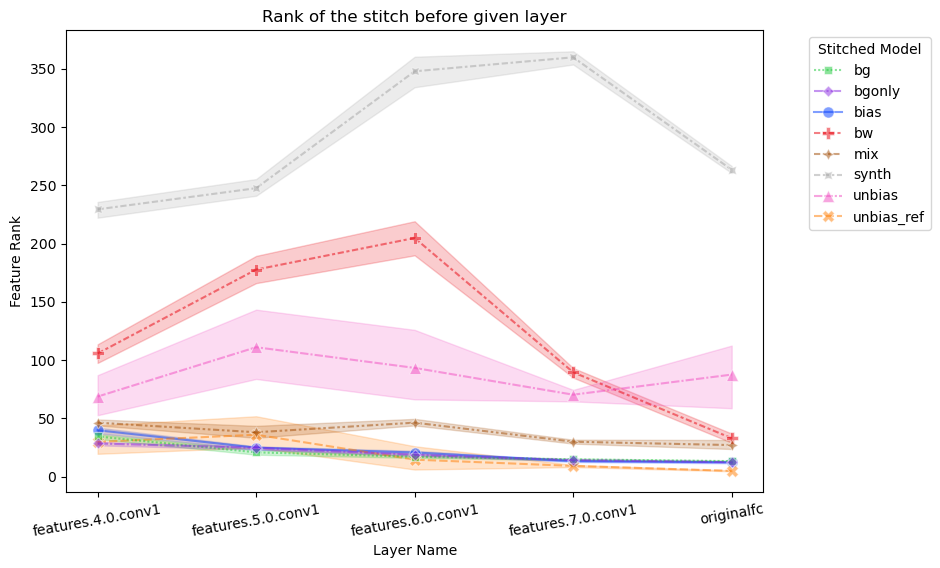

In [9]:
formatted_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
logfile_name = formatted_time + "_ranks_exp3_log.txt"
save_log_as = f"./results_3/{logfile_name}"
logtofile(f"Logging to {save_log_as}")
import os 

# exp2 colour_MNIST
csvs_from = os.path.join("../msc_similarity/exp2_ms_with_colorMNIST/results_rank/", "*.csv")
df1 = csv_to_df(csvs_from)

# exp1 Synthetic stitch
csvs_from = os.path.join("../msc_similarity/exp1_ms_with_random_dataset/results_rank/", "*.csv")
df2 = csv_to_df(csvs_from)

# select only the data for synthetic data stitched into the unbias-trained network 
df3 = df2[df2['model'].str.contains('^X\dunbias')].copy()

df = pd.concat([df1, df3], ignore_index=True)
del df1, df2, df3

# Edit names to match the whole-network naming
df['name'] = df['name'].str.replace(r'_rcv_', '', regex=True)
df['name'] = df['name'].str.replace(r'^rcv_', '', regex=True)
df['name'] = df['name'].str.replace(r'^send_', '', regex=True)

send_models = {'unbias_ref': '^unbias$',
               'bg':         '^bg\d', # these three may learn colours as a shortcut
               'bgonly':     '^bgonly\d', 
               'bias':       '^bias\d',  
               'unbias':     '^unbias\d', # these three have to learn to read digits
               'mix':        '^mix\d', 
               'bw':         '^bw\d',
               'synth':      '^X\dunbias'} # syntetic random data stitched in

df['sender'] = 'unknown'

sizes = {}
for k, v in send_models.items(): 
        
    # unsorted dataframe, but filtered to include only the data for one send model type
    selected_set = (df['model'].str.contains(v))
    df.loc[selected_set, 'sender'] = k
    sizes[k] = len((df['model'].str.contains(v)))

# Check numbers of samples per model
print(f"Check number of samples per model:\n{sizes}")


import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch

# cheatingly noted the text names of the layers in order.
# Note that the stitch.s_conv1 layer appears first in the list, even though conceptually it 
# could be considered to be in the middle of the full network at the point of the cut
# This made sense for the truncated networks in part 1 but not 
#                         preceder for rcvr      stitch
layer_of_stitch =    {3: ('features.0'         ,'stitch.s_conv1'),
                      4: ('features.4.1.conv2' ,'stitch.s_conv1'),
                      5: ('features.5.1.conv2' ,'stitch.s_conv1'),
                      6: ('features.6.1.conv2' ,'stitch.s_conv1'),
                      7: ('features.7.1.conv2' ,'stitch.s_conv1')}

cat_order = ['features.4.0.conv1',  
             'features.5.0.conv1',  
             'features.6.0.conv1', 
             'features.7.0.conv1',  
             'originalfc']

combined_condition = pd.Series([False] * len(df))
df['stitch_before'] = 'unknown'
        
for k, v in layer_of_stitch.items(): 
    # The stitch layer
    model_match = (df['model'].str.contains(f"{k}"))
    layer_match = (df['name'].str.contains(v[1]))
    combined_condition_s = (model_match & layer_match)
    df.loc[combined_condition_s, 'stitch_before'] = cat_order[k-3]
    
    # Add in the reference model that has no stitch, was trained on unbias dataset but has bias data input to it
    model_match = (df['model'].str.contains(send_models['unbias_ref']))
    layer_match = (df['name'].str.contains(v[0]))
    combined_condition_u = (model_match & layer_match)
    df.loc[combined_condition_u, 'stitch_before'] = cat_order[k-3]
    

    combined_condition |= combined_condition_s | combined_condition_u
df2 = df[combined_condition ].copy() 
df3 = df2[df2['sender'] != 'unknown'].copy()


# Sort the model column and create a categorical type with sorted categories 
# e.g models are X6bgonly or bgonly
df3['stitch_before'] = pd.Categorical(df3['stitch_before'], categories=cat_order, ordered=True)
# Create line plot
plt.figure(figsize=(9,6))
#line_plot = sns.lineplot(data=df3, x='name', y='features_rank', hue='sender', marker='o', markersize=8, alpha=0.5, palette='bright')
line_plot = sns.lineplot(data=df3, x='stitch_before', y='features_rank', hue='sender', style='sender', markers=True, dashes=True, markersize=8, alpha=0.5, palette='bright')

plt.title("Rank of the stitch before given layer")
plt.xlabel('Layer Name')
plt.ylabel('Feature Rank')
#plt.yscale('log')
plt.xticks(rotation=10)

handles, labels = line_plot.get_legend_handles_labels()
sorted_labels_handles = sorted(zip(labels, handles))
labels, handles = zip(*sorted_labels_handles)
plt.legend(handles, labels, title='Stitched Model', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.savefig(f"./results_2d/lin_at_stitch_ranks.png", bbox_inches='tight')
plt.show()


# Experiment 2e - Plot Rank After Stitch
Networks trained for 4 epochs. Stitch trained for 10 epochs.
Measure the Rank of the activations in the first layer of the receiver network after the stitch. If the Sender + Stitch were equivalent to the early layers of the receiver network then the rank (after processing by the Receiver) should be unchanged. 

Logging to ./results_2/2024-08-05_11-15-43_ranks_exp2_log.txt
Check number of samples per model:
{'unbias_ref': 2179, 'bg': 2179, 'bgonly': 2179, 'bias': 2179, 'unbias': 2179, 'mix': 2179, 'bw': 2179, 'synth': 2179}
Check number of samples per model:
{'unbias_ref': 97, 'bg': 97, 'bgonly': 97, 'bias': 97, 'unbias': 97, 'mix': 97, 'bw': 97, 'synth': 97}


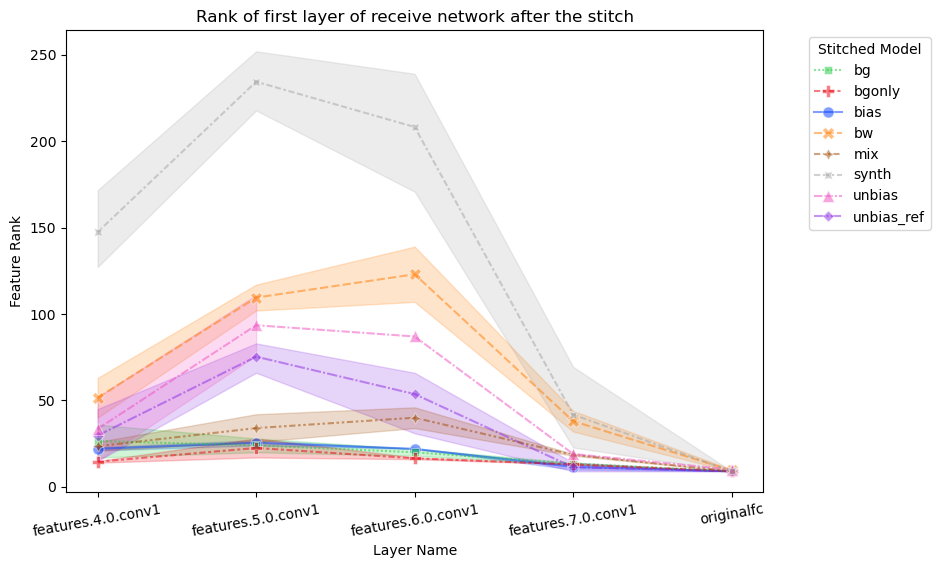

In [10]:
formatted_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
logfile_name = formatted_time + "_ranks_exp2_log.txt"
save_log_as = f"./results_2/{logfile_name}"
logtofile(f"Logging to {save_log_as}")
import os 

# exp2 colour_MNIST
csvs_from = os.path.join("../msc_similarity/exp2_ms_with_colorMNIST/results_4_epochs_rank/", "*.csv")
df1 = csv_to_df(csvs_from)

# exp1 Synthetic stitch
csvs_from = os.path.join("../msc_similarity/exp1_ms_with_random_dataset/results_4_epochs_rank/", "*.csv")
df2 = csv_to_df(csvs_from)

# select only the data for synthetic data stitched into the unbias-trained network 
df3 = df2[df2['model'].str.contains('^X\dunbias')].copy()

df = pd.concat([df1, df3], ignore_index=True)
del df1, df2, df3

# Edit names to match the whole-network naming
df['name'] = df['name'].str.replace(r'_rcv_', '', regex=True)
df['name'] = df['name'].str.replace(r'^rcv_', '', regex=True)
df['name'] = df['name'].str.replace(r'^send_', '', regex=True)

send_models = {'unbias_ref': '^unbias$',
               'bg':         '^bg\d', # these three may learn colours as a shortcut
               'bgonly':     '^bgonly\d', 
               'bias':       '^bias\d',  
               'unbias':     '^unbias\d', # these three have to learn to read digits
               'mix':        '^mix\d', 
               'bw':         '^bw\d',
               'synth':      '^X\dunbias'} # syntetic random data stitched in

df['sender'] = 'unknown'
sizes = {}
for k, v in send_models.items(): 
        
    # unsorted dataframe, but filtered to include only the data for one send model type
    selected_set = (df['model'].str.contains(v))
    df.loc[selected_set, 'sender'] = k
    sizes[k] = len((df['model'].str.contains(v)))

# Check numbers of samples per model
print(f"Check number of samples per model:\n{sizes}")

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch

# cheatingly noted the text names of the layers in order.
# Note that the stitch.s_conv1 layer appears first in the list, even though conceptually it 
# could be considered to be in the middle of the full network at the point of the cut
# This made sense for the truncated networks in part 1 but not 
layer_after_stitch = {3: 'features.4.0.conv1',
                      4: 'features.5.0.conv1',
                      5: 'features.6.0.conv1',
                      6: 'features.7.0.conv1',
                      7: 'originalfc'}

cat_order = ['features.4.0.conv1',  
             'features.5.0.conv1',  
             'features.6.0.conv1', 
             'features.7.0.conv1',  
             'originalfc']

combined_condition = pd.Series([False] * len(df))

sizes = {}
for k, v in layer_after_stitch.items(): 

    model_match = (df['model'].str.contains(f"{k}"))
    layer_match = (df['name'].str.contains(v))
    combined_condition |= (model_match & layer_match)

    # Add in the reference model that has no stitch, was trained on unbias dataset but has bias data input to it
    model_match = (df['model'].str.contains(send_models['unbias_ref']))
    layer_match = (df['name'].str.contains(v))
    combined_condition |= (model_match & layer_match)

df2 = df[combined_condition ].copy() 
df3 = df2[df2['sender'] != 'unknown'].copy()

#########################
sizes = {}
for k, v in send_models.items():         
    # Now that d3 has been filtered down, check again how many samples per model
    sizes[k] = len((df3['model'].str.contains(v)))

# Check numbers of samples per model
print(f"Check number of samples per model:\n{sizes}")
#######################

# Sort the model column and create a categorical type with sorted categories 
# e.g models are X6bgonly or bgonly
df3['name'] = pd.Categorical(df3['name'], categories=cat_order, ordered=True)
# Create line plot
plt.figure(figsize=(9,6))
#line_plot = sns.lineplot(data=df3, x='name', y='features_rank', hue='sender', marker='o', markersize=8, alpha=0.5, palette='bright')
line_plot = sns.lineplot(data=df3, x='name', y='features_rank', hue='sender', style='sender', markers=True, dashes=True, markersize=8, alpha=0.5, palette='bright')

plt.title("Rank of first layer of receive network after the stitch")
plt.xlabel('Layer Name')
plt.ylabel('Feature Rank')
#plt.yscale('log')
plt.xticks(rotation=10)

handles, labels = line_plot.get_legend_handles_labels()
sorted_labels_handles = sorted(zip(labels, handles))
labels, handles = zip(*sorted_labels_handles)
plt.legend(handles, labels, title='Stitched Model', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.savefig(f"./results_2e/lin_post_stitch_ranks.png", bbox_inches='tight')
plt.show()



# Experiment 2e plot the rank of the stitch - Networks trained for 4 epochs only (Stitch for 10)
Examine how the rank of output of Sender and Stitch varies as compared with the rank of the original Receiver network near that point. 


Logging to ./results_3/2024-08-05_11-15-45_ranks_exp3_log.txt
Check number of samples per model:
{'unbias_ref': 2179, 'bg': 2179, 'bgonly': 2179, 'bias': 2179, 'unbias': 2179, 'mix': 2179, 'bw': 2179, 'synth': 2179}


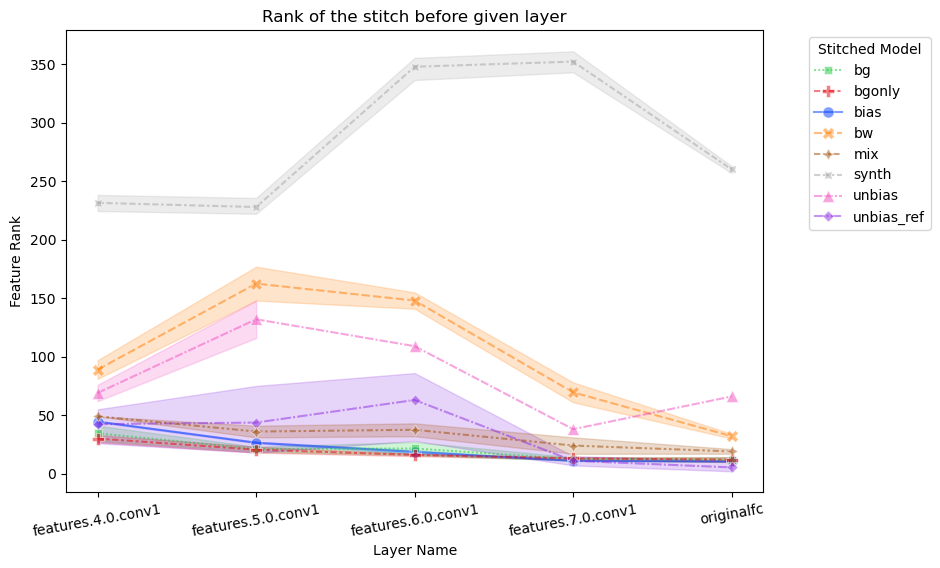

In [11]:
formatted_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
logfile_name = formatted_time + "_ranks_exp3_log.txt"
save_log_as = f"./results_3/{logfile_name}"
logtofile(f"Logging to {save_log_as}")
import os 

# exp2 colour_MNIST
csvs_from = os.path.join("../msc_similarity/exp2_ms_with_colorMNIST/results_4_epochs_rank/", "*.csv")
df1 = csv_to_df(csvs_from)

# exp1 Synthetic stitch
csvs_from = os.path.join("../msc_similarity/exp1_ms_with_random_dataset/results_4_epochs_rank/", "*.csv")
df2 = csv_to_df(csvs_from)

# select only the data for synthetic data stitched into the unbias-trained network 
df3 = df2[df2['model'].str.contains('^X\dunbias')].copy()

df = pd.concat([df1, df3], ignore_index=True)
del df1, df2, df3

# Edit names to match the whole-network naming
df['name'] = df['name'].str.replace(r'_rcv_', '', regex=True)
df['name'] = df['name'].str.replace(r'^rcv_', '', regex=True)
df['name'] = df['name'].str.replace(r'^send_', '', regex=True)

send_models = {'unbias_ref': '^unbias$',
               'bg':         '^bg\d', # these three may learn colours as a shortcut
               'bgonly':     '^bgonly\d', 
               'bias':       '^bias\d',  
               'unbias':     '^unbias\d', # these three have to learn to read digits
               'mix':        '^mix\d', 
               'bw':         '^bw\d',
               'synth':      '^X\dunbias'} # syntetic random data stitched in

df['sender'] = 'unknown'

sizes = {}
for k, v in send_models.items(): 
        
    # unsorted dataframe, but filtered to include only the data for one send model type
    selected_set = (df['model'].str.contains(v))
    df.loc[selected_set, 'sender'] = k
    sizes[k] = len((df['model'].str.contains(v)))

# Check numbers of samples per model
print(f"Check number of samples per model:\n{sizes}")


import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch

# cheatingly noted the text names of the layers in order.
# Note that the stitch.s_conv1 layer appears first in the list, even though conceptually it 
# could be considered to be in the middle of the full network at the point of the cut
# This made sense for the truncated networks in part 1 but not 
#                         preceder for rcvr      stitch
layer_of_stitch =    {3: ('features.0'         ,'stitch.s_conv1'),
                      4: ('features.4.1.conv2' ,'stitch.s_conv1'),
                      5: ('features.5.1.conv2' ,'stitch.s_conv1'),
                      6: ('features.6.1.conv2' ,'stitch.s_conv1'),
                      7: ('features.7.1.conv2' ,'stitch.s_conv1')}

cat_order = ['features.4.0.conv1',  
             'features.5.0.conv1',  
             'features.6.0.conv1', 
             'features.7.0.conv1',  
             'originalfc']

combined_condition = pd.Series([False] * len(df))
df['stitch_before'] = 'unknown'
        
for k, v in layer_of_stitch.items(): 
    # The stitch layer
    model_match = (df['model'].str.contains(f"{k}"))
    layer_match = (df['name'].str.contains(v[1]))
    combined_condition_s = (model_match & layer_match)
    df.loc[combined_condition_s, 'stitch_before'] = cat_order[k-3]
    
    # Add in the reference model that has no stitch, was trained on unbias dataset but has bias data input to it
    model_match = (df['model'].str.contains(send_models['unbias_ref']))
    layer_match = (df['name'].str.contains(v[0]))
    combined_condition_u = (model_match & layer_match)
    df.loc[combined_condition_u, 'stitch_before'] = cat_order[k-3]
    

    combined_condition |= combined_condition_s | combined_condition_u
df2 = df[combined_condition ].copy() 
df3 = df2[df2['sender'] != 'unknown'].copy()


# Sort the model column and create a categorical type with sorted categories 
# e.g models are X6bgonly or bgonly
df3['stitch_before'] = pd.Categorical(df3['stitch_before'], categories=cat_order, ordered=True)
# Create line plot
plt.figure(figsize=(9,6))
#line_plot = sns.lineplot(data=df3, x='name', y='features_rank', hue='sender', marker='o', markersize=8, alpha=0.5, palette='bright')
line_plot = sns.lineplot(data=df3, x='stitch_before', y='features_rank', hue='sender', style='sender', markers=True, dashes=True, markersize=8, alpha=0.5, palette='bright')

plt.title("Rank of the stitch before given layer")
plt.xlabel('Layer Name')
plt.ylabel('Feature Rank')
#plt.yscale('log')
plt.xticks(rotation=10)

handles, labels = line_plot.get_legend_handles_labels()
sorted_labels_handles = sorted(zip(labels, handles))
labels, handles = zip(*sorted_labels_handles)
plt.legend(handles, labels, title='Stitched Model', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.savefig(f"./results_2e/lin_at_stitch_ranks.png", bbox_inches='tight')
plt.show()
